## FFT

Based on material in Section 5.4 of SciPy Lecture Notes (2015), http://www.scipy-lectures.org/. 

In [1]:
import scipy as sp
from scipy import fftpack

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Generate signal

Signal is two superposed sine waves with noise.

In [2]:
a1, a2 = 2, 1  # Amplitudes
f1, f2 = 5, 10 # Frequencies
tf = 2         # Final time
dt = 0.01      # Time step

In [3]:
t = sp.arange(0,tf,dt)  # Signal samle times

In [4]:
sig = a1*sp.sin(2.*sp.pi*f1*t) + a2*sp.sin(2.*sp.pi*f2*t)
sig += 3*sp.random.random(len(t))

<IPython.core.display.Javascript object>


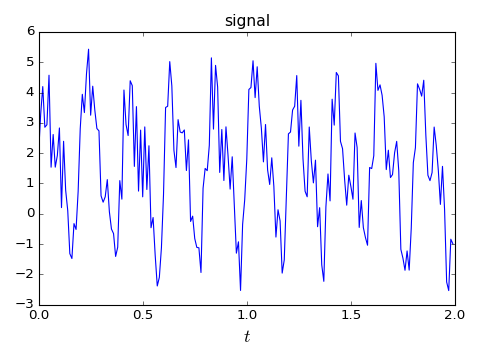

In [5]:
plt.figure(1)
plt.title("signal",fontsize=14)
plt.xlabel("$t$")
plt.plot(t,sig)

### Calculate FFT

In [6]:
sample_freq = sp.fftpack.fftfreq(len(sig),d=dt) # Frequency values (+,-)
sig_fft = sp.fftpack.fft(sig)                   # Calculate FFT

- Display real and imaginary parts of FFT.
- 0 is in center
- Symmetric about 0

<IPython.core.display.Javascript object>


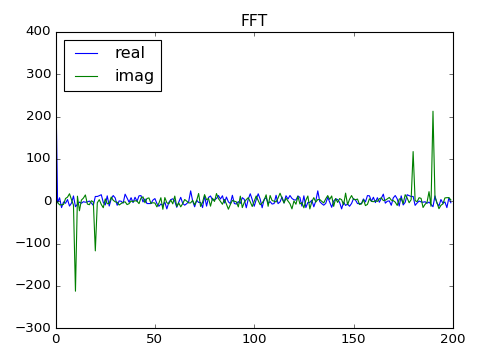

In [7]:
plt.figure(2)
plt.title("FFT",fontsize=14)
plt.plot(sig_fft.real, label='real')
plt.plot(sig_fft.imag,label='imag')
plt.legend(loc=2)

Calculate and plot power spectrum for $f>0$.

In [8]:
pfs = sp.where(sample_freq>0) # Select postive frequencies
freqs = sample_freq[pfs]
power = abs(sig_fft)[pfs]**2      

<IPython.core.display.Javascript object>


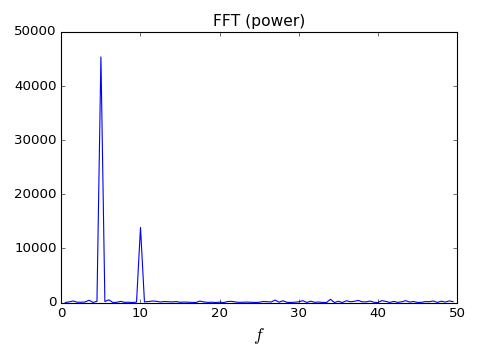

In [9]:
plt.figure(3)
plt.title("FFT (power)",fontsize=14)
plt.xlabel("$f$")
plt.plot(freqs,power)

### Filter and inverse transform

Crude low-pass filter: cut out all frequencies greater than 12.

In [10]:
sig_fft[abs(sample_freq)> 12] = 0

Calculate inverse FFT:

In [11]:
sig_filtered = sp.fftpack.ifft(sig_fft)

<IPython.core.display.Javascript object>


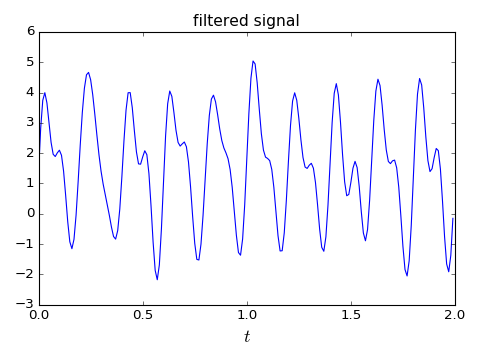

In [12]:
plt.figure(4)
plt.title("filtered signal",fontsize=14)
plt.xlabel("$t$")
plt.plot(t,sp.real(sig_filtered));

#### Version information

version_information from J.R. Johansson (jrjohansson at gmail.com) See Introduction to scientific computing with Python http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb If version_information has been installed, continue with the next cell. If not, do a one-time install it with
pip install --upgrade version_information, OR
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py (deprecated)

In [13]:
%load_ext version_information

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [14]:
version_information scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 11:33:45 2017 EDT